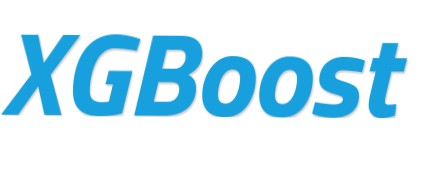

**Main Components of this Kernel**  
1. Problem statement
2. Importing necessary modules along with dataset  
3. Reconnissance of the dataset and EDA  
4. Logistic Regression  
5. XGBoost Classifier without Hyperparameter tuning  
6. XGBoost Classifier with Hyperparameter tuning 
7. The differences

<br/>

## 1. problem Statement
**We are given some information regarding bank account. Now we will have to predict whether a customer will stay or not.  
We will use Kaggles 'Churn Modelling' here.**

<br/>

## 2. Importing necessary modules along with dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

import xgboost
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [28]:
df = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/Churn_Modelling.csv')

<br/>

# 3. Reconnissance of the dataset and EDA

In [29]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#### Checking the missng values

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Observing the correlation

In [6]:
df[df.columns[2:]].corr()['Exited'][:]

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

#### Correlation with Heatmap

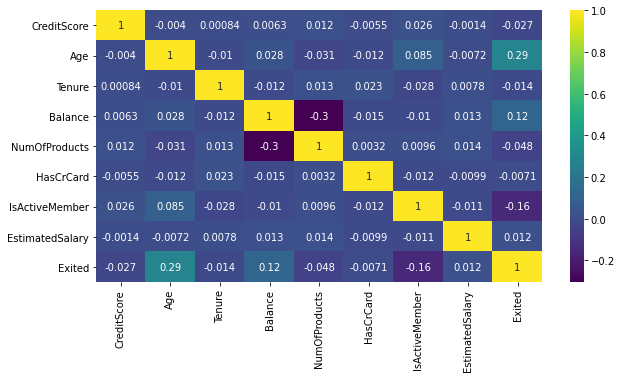

In [31]:
co = df[df.columns[2:]].corr()['Exited'][:]
features = co.index

plt.figure(figsize = (10, 5))
sns.heatmap(df[features].corr(), annot = True, cmap = 'viridis')
plt.show()

#### Split the dataset into explanatory and response variable

In [8]:
X = df.iloc[:, 3:13]
y = df.iloc[:, -1]

#### Convert the categorical features into dummy variables

In [9]:
X = pd.get_dummies(X, columns = ['Geography', 'Gender'], drop_first = True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


#### Split into train and test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<br/>

## 4. Logistic Regression

In [33]:
lr = LogisticRegression()

# Train the model
model = lr.fit(X_train, y_train)

# Prediction
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

# Accuracy Score
print('Train Accuracy score : {}\n'.format(accuracy_score(y_train, y_pred_train)))
print('Test Accuracy score : {}'.format(accuracy_score(y_test, y_pred_test)))

Train Accuracy score : 0.789875

Test Accuracy score : 0.789


<br/>

## 5. XGBoost Classifier without Hyperparameter tuning

In [35]:
cl1 = XGBClassifier()

# Train the model
model1 = cl1.fit(X_train, y_train)

# Prediction
y1_train_pred = cl1.predict(X_train)
y1_test_pred = cl1.predict(X_test)

# Accuracy Score
print('Train Accuracy score : {}\n'.format(accuracy_score(y_train, y1_train_pred)))
print('Test Accuracy score : {}'.format(accuracy_score(y_test, y1_test_pred)))

Train Accuracy score : 0.95775

Test Accuracy score : 0.8545


<br/>

## 6. XGBoost Classifier with Hyperparameter tuning

#### Hyperparameters I choose to work with

In [12]:
params = {
    'learning_rate'     : [0.05, 0.10, 0.05, 0.20, 0.25, 0.30],
    'max_depth'         : [3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight'  : [1, 3, 5, 7],
    'gamma'             : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'colsmaple_bytree'  : [0.3, 0.4, 0.5, 0.6, 0.7]
    }

In [41]:
cl2 = XGBClassifier()
random_search = RandomizedSearchCV(cl2, param_distributions = params,
                                   n_iter = 5, scoring = 'roc_auc',
                                   n_jobs = -1,
                                   cv = 5,
                                   verbose = 3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   15.3s finished


[12:11:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { colsmaple_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [42]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, colsmaple_bytree=0.4,
              gamma=0.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [43]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsmaple_bytree': 0.4}

In [45]:
# Prediction
y2_train_pred = random_search.predict(X_train)
y2_test_pred = random_search.predict(X_test)

# Accuracy Score
print('Train Accuracy score : {}\n'.format(accuracy_score(y_train, y2_train_pred)))
print('Test Accuracy score : {}'.format(accuracy_score(y_test, y2_test_pred)))

Train Accuracy score : 0.875

Test Accuracy score : 0.867


<br/>

## 7. The differences

**Logistic Regression**  
Train Accuracy score : 0.789875  
Test Accuracy score : 0.789  
**Conclusion:** Not that bad. But let's try it with XGBoost.

<br/>


**XGBoost Classifier without Hyperparameter tuning**  
Train Accuracy score : 0.95775  
Test Accuracy score : 0.8545  
**Conclusion:** A way better than Logistic Regression. But it looks like a bit overfitting. Now time to see what hyperparameter tuning can do for us.

<br/>

**XGBoost Classifier with Hyperparameter tuning**  
Train Accuracy score : 0.875  
Test Accuracy score : 0.867  
**Conclusion:** Hyperparameter tuning increases the test accuracy along with reducing the overfitting problem.